## Box-Cox transformation of Yelp business review counts

In [1]:
import json
import pandas as pd

from scipy import stats

biz_file = open('/Users/ktxdev/Documents/Data/yelp_dataset/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

#### Checking the min to make sure data is positive

In [2]:
biz_df['review_count'].min()

5

In [10]:
biz_df['rc_log'] = stats.boxcox(biz_df['review_count'], lmbda = 0)

rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
biz_df['rc_bc'] = rc_bc

#### Visualizing the histograms of original, log transformed, and Box- Cox transformed counts

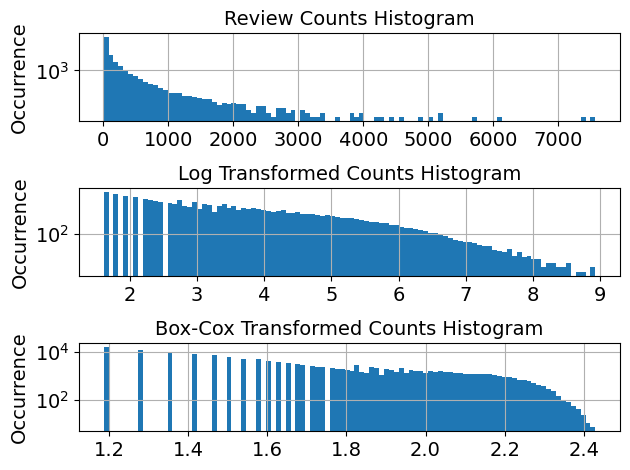

In [12]:
from matplotlib import pyplot as plt 

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
# original review count histogram
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)
# review count after log transform
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)
# review count after optimal Box-Cox transform
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)
plt.tight_layout()